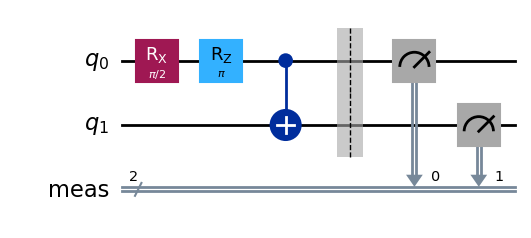

In [132]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2,QiskitRuntimeService
import numpy as np
# Создаем схему с 2 квантовыми битами и 2 классическими
qc = QuantumCircuit(2)
# Добавляем квантовые операции
# qc.h(1)  # Применяем оператор Адамара
# qc.cx(1, 0)  # CNOT между 0 и 1
qc.rx(np.pi/2,0)
qc.rz(np.pi,0)
qc.cx(0,1)
# Добавляем измерение
qc.measure_all()
qc.draw("mpl")

In [153]:
# Instantiate Simulator
fake_manila = FakeManilaV2()

# Transpile QC
pm = generate_preset_pass_manager(backend=fake_manila, optimization_level=1)
isa_qc = pm.run(qc)
 
# Instantiate Sampler
options = {"simulator": {"seed_simulator": 42}}
sampler = SamplerV2(mode=fake_manila, options=options)

# Run And Transform Result in Simulator through Sampler
result = sampler.run([isa_qc]).result()
print(result[0].data.meas.get_counts())

{'11': 509, '00': 515}


/Users/ilyaivanov/dev/UNIVERSITY/dissertation/dissertation-venv/lib/python3.9/site-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


In [167]:
sampler = StatevectorSampler()
sampler_result = sampler.run([qc],shots=1024).result()
print(sampler_result[0].data.meas)
print(sampler_result[0].data.meas.get_counts())

BitArray(<shape=(), num_shots=1024, num_bits=2>)
{'11': 517, '00': 507}


In [ ]:
# Backend working example
# service = QiskitRuntimeService()
# backend = service.least_busy(operational=True, simulator=False, min_num_qubits=12)
# pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
# isa_circuit = pm.run(qc)
 
# sampler = Sampler(backend)
# job = sampler.run([isa_circuit])
# result = job.result()
# pub_result = result[0]


AccountNotFoundError: 'Unable to find account.'